# Importando bibliotecas

In [1235]:
import pandas as pd
import numpy as np

# Carregando dados

In [1236]:
pd.set_option('display.max_columns', None)

In [1237]:
dados_original = pd.read_excel('Leontis.xlsx')
dados_original.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 a 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


# Tratando dataframe

In [1238]:
dados_original.loc[dados_original['Em qual faixa etária você se encaixa?'] == 'Entre 19 e 24 anos', 'Em qual faixa etária você se encaixa?'] = 'Entre 18 e 24 anos'

dados_original.loc[dados_original['Em qual faixa etária você se encaixa?'] == 'Entre 46 a 59 anos', 'Em qual faixa etária você se encaixa?'] = 'Entre 46 e 59 anos'

dados_original.loc[dados_original['Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.'] == 'Sem um guia/planejamento para ver as obras', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.'] = 'Sem um guia/planejamento para ver as obras.'

In [1239]:
dados = dados_original.copy()

## Escolhendo colunas

In [1240]:
dados.columns

Index(['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome',
       'Hora da última modificação', 'Em qual faixa etária você se encaixa?',
       'Com qual gênero você se identifica?',
       'Qual seu nível de formação atual?',
       'Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
   

In [1241]:
dados.drop(columns=['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome', 'Hora da última modificação'], inplace=True)
dados.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
3,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


## Dados nulos e outliers

In [1242]:
for i in dados:
    print(i)
    print(dados[i].unique())
    print()
    print("=" * 30)

# 'Entre 19 e 24 anos' -> 'Entre 18 e 24 anos'
# 'Entre 46 a 59 anos' -> 'Entre 46 e 59 anos'
# 'Sem um guia/planejamento para ver as obras' -> 'Sem um guia/planejamento para ver as obras.'

Em qual faixa etária você se encaixa?
['Menos de 18 anos' 'Entre 25 e 35 anos' 'Entre 46 e 59 anos'
 'Entre 36 e 45 anos' 'Entre 18 e 24 anos' '60+ anos']

Com qual gênero você se identifica?
['Masculino' 'Feminino' 'Outro']

Qual seu nível de formação atual?
['Cursando ensino médio' 'Ensino superior concluído'
 'Cursando ensino superior' 'Cursando ensino fundamental'
 'Ensino fundamental incompleto' 'Ensino superior incompleto/não iniciado'
 'Ensino médio incompleto']

Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
['Classes D/E: até R$ 2,9 mil' 'Classe C: entre R$ 2,9 mil e R$ 7,1 mil'
 'Classe B: entre R$ 7,1 mil e R$ 22 mil' 'Classe A: superior a R$ 22 mil']

Há quanto tempo você se interessa por arte?
['Menos de 2 anos' 'Não me interesso' 'De 2 a 4 anos'
 'Estou iniciando agora' 'Há mais de 10 anos' 'De 5 a 9 anos']

Qual das opções de arte abaixo você mais gosta?
['Fotografia' 

In [1243]:
# dados.fillna("Sem registro", inplace=True)

In [1244]:
df = dados.copy()

## Transformando em numerico

In [1245]:
df.fillna("#", inplace=True)
df.loc[df['Há quanto tempo você se interessa por arte?'] == 'Não me interesso', 'Há quanto tempo você se interessa por arte?'] = '#'
for i in df:
    print(i)
    if df[i].dtype == object:
        dados_unique = df[i].unique()
        dados_unique.sort()
        mapeamento = {}
        for k, v in enumerate(dados_unique):
            mapeamento[v] = k

    df[i] = df[i].map(mapeamento)

Em qual faixa etária você se encaixa?
Com qual gênero você se identifica?
Qual seu nível de formação atual?
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Há quanto tempo você se interessa por arte?
Qual das opções de arte abaixo você mais gosta?
Com que frequência você vai aos museus?
Você já participou de algum curso ou atividade relacionada à arte?
Você segue artístas ou páginas relacionadas à arte nas rede sociais?
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Você já usou um aplicativo de um museu ou relacionado à arte?
O que mais te atrai em visitar museus ou exposições de arte?
Você sente falta de mais informações sobre as obras nos museus?
Você procura saber sobre essas informações faltantes?
De que forma você costuma buscar essas informações?
Você encontra o que precisa/esperava ao pesquisar?


In [1246]:
df.head(10)

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,5,1,1,3,5,5,5,1,2,3,1,4,2,2,4,1
1,2,0,5,2,0,0,0,0,0,0,0,0,0,0,0,0
2,5,0,1,2,1,4,4,2,2,3,1,2,1,0,0,0
3,5,1,1,1,3,6,4,1,2,3,1,4,2,1,0,0
4,4,1,5,0,4,5,2,2,1,2,2,3,2,1,0,0
5,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
6,3,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
7,5,0,1,2,1,2,4,2,2,3,1,4,2,1,0,0
8,1,0,2,1,1,5,5,2,2,4,1,3,2,1,0,0
9,5,0,1,2,5,4,5,1,2,3,1,3,2,1,0,0


# Modelo não supervisionado cru

In [1247]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 5, random_state=0, n_init="auto")

modelo.fit(df)

centers = modelo.cluster_centers_  

labels = modelo.labels_

print(labels)

[1 4 2 2 3 0 4 2 2 2 2 1 3 2 1 0 2 2 0 2 0 2 0 0 1 0 0 2 0 1 1 1 4 2 2 0 2
 1 0 4 2 2 2 1 1 0 0 3 3 4 0 1 2 2 4 1 2 2 0 1 3 4 3 0 2 2 3 2 3 2 2 0 2 3
 1 3 2 3 4 4 3 4 0 4 1 2 0 2 2 2 2 1 3 2 2 2 0 1 3 2 1 0 2 3 2 3 3 2 1 0 2
 0 2 3 3 4 1 4 0 2 2 3 0 3 2 2 0 1 2 2 2 0 2 2 3 3 0 0 2 1 3 1 1 0 0 4 3 4
 2 1 2 3 4 1 1 0 1 1 0 3 0 0 1 4 1 2 1 0 1 1 2 1 2 2 4 3 3 3 3 3 3 3 3 3 1
 3 4 1 1 4 4 3 3 4 3 3 3 3 4 3 2 4 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 4 3 3 1 2
 4 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3]


In [1248]:
dados['Cluster'] = labels

In [1249]:
centers

array([[ 5.00000000e+00,  5.00000000e-01,  3.61111111e-01,
         1.36111111e+00,  2.77777778e-02,  2.77777778e-02,
         8.33333333e-02,  5.55555556e-02,  2.77777778e-02,
         2.77777778e-02,  2.77777778e-02,  5.55555556e-02,
         2.77777778e-02,  4.44089210e-16, -6.66133815e-16,
        -1.11022302e-16],
       [ 4.58974359e+00,  4.87179487e-01,  7.94871795e-01,
         1.92307692e+00,  3.12820513e+00,  4.46153846e+00,
         4.53846154e+00,  1.61538462e+00,  1.97435897e+00,
         2.84615385e+00,  1.25641026e+00,  3.10256410e+00,
         2.00000000e+00,  2.00000000e+00,  4.41025641e+00,
         1.69230769e+00],
       [ 4.60655738e+00,  4.09836066e-01,  7.21311475e-01,
         1.65573770e+00,  2.54098361e+00,  4.50819672e+00,
         3.91803279e+00,  1.52459016e+00,  1.83606557e+00,
         2.78688525e+00,  1.18032787e+00,  3.44262295e+00,
         1.44262295e+00,  5.57377049e-01,  6.55737705e-02,
         4.91803279e-02],
       [ 2.30666667e+00,  3.20000000e

In [1250]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from pandas.plotting import parallel_coordinates

# # Criar uma cópia dos dados para adicionar as informações de cluster
# dados_com_clusters = dados.copy()
# dados_com_clusters['Cluster'] = modelo.labels_

# # Plotagem de coordenadas paralelas
# plt.figure(figsize=(15, 8))
# parallel_coordinates(dados_com_clusters, class_column='Cluster', colormap='viridis')
# plt.title('Parallel Coordinates Plot para Clusters')
# plt.xlabel('Features')
# plt.ylabel('Valores')
# plt.grid(True)
# plt.show()

In [1251]:
# import seaborn as sns

# # Adicionar coluna de cluster ao dataframe
# dados_com_clusters = dados.copy()
# dados_com_clusters['Cluster'] = modelo.labels_

# # Usando Seaborn para criar a matriz de dispersão
# sns.pairplot(dados_com_clusters, hue='Cluster', palette='viridis')
# plt.show()


## Visualizando as características de cada cluster

In [1252]:
cluster_0 = dados.loc[dados['Cluster'] == 0]
cluster_1 = dados.loc[dados['Cluster'] == 1]
cluster_2 = dados.loc[dados['Cluster'] == 2]
cluster_3 = dados.loc[dados['Cluster'] == 3]
cluster_4 = dados.loc[dados['Cluster'] == 4]

### Analisando Cluster 0

In [1253]:
cluster_0.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
5,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
18,Menos de 18 anos,Feminino,Cursando ensino fundamental,Classe A: superior a R$ 22 mil,Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
20,Menos de 18 anos,Feminino,Cursando ensino fundamental,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
22,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [1254]:
for i in cluster_0:
    print(cluster_0[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos    36
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     18
Masculino    18
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino fundamental    23
Cursando ensino médio          13
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    15
Classe B: entre R$ 7,1 mil e R$ 22 mil     13
Classe A: superior a R$ 22 mil              6
Classes D/E: até R$ 2,9 mil                 2
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Não me interesso    35
De 2 a 4 anos        1
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Arquitetura e Urbanismo    1
Name: count, dtype: int64
Com que frequência você vai aos museus?
Nunca    1
Name: count, dtype: int64
Você já participou de algum curso 

#### Cluster 0

ANOTAÇÕES
- Cluster só com pessoas que não possuem interesse por arte, exceto um, que já fica satisfeito com as informações disponibilizadas nos museus
- <font color='yellow'>Não utilizariam do nosso aplicativo por não se interessar por arte ou não sentir falta de informações</font>

### Analisando Cluster 1

In [1255]:
cluster_1.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,1
11,Menos de 18 anos,Masculino,Cursando ensino fundamental,"Classes D/E: até R$ 2,9 mil",De 2 a 4 anos,Arte digital,Nunca,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,1
14,Menos de 18 anos,Feminino,Cursando ensino fundamental,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,1
24,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Menos de 2 anos,Fotografia,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em inteligências artificiais (ChatGPT, G...",Sim,1
29,Menos de 18 anos,Feminino,Ensino fundamental incompleto,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Pintura,Raramente (uma vez ao ano),Sim,Sim,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,1


In [1256]:
for i in cluster_1:
    print(cluster_1[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      34
Entre 18 e 24 anos     3
Entre 25 e 35 anos     1
Entre 46 e 59 anos     1
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     24
Masculino    11
Outro         4
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino fundamental      17
Cursando ensino médio            16
Ensino fundamental incompleto     3
Cursando ensino superior          3
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    18
Classe B: entre R$ 7,1 mil e R$ 22 mil     12
Classes D/E: até R$ 2,9 mil                 9
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       13
De 2 a 4 anos             8
Menos de 2 anos           7
De 5 a 9 anos             6
Estou iniciando agora     5
Name: count, dtype: int

#### Cluster 1

ANOTAÇÕES
- Grande predominância de menores de 18 anos
- Predominância feminina neste cluster
- Renda per capita da casa, média
- Maior interesse por arte há mais de 10 anos
- Frequencia em museus baixa
- Todos sentem falta de informações nos museus
- Todos procuram saber mais sobre
- <font color='yellow'>Possíveis utilizadores do app, já que sentem falta de informações e procuram saber sobre; se interessarem mais por pinturas e fotografias, que são presentes em museus; boa parte utiliza de guias. Porém a maioria das vezes encontram o que precisavam/esperavam e não costumam ir muito para o museu</font>

RESULTADO POR COLUNA
- Em qual faixa etária você se encaixa? <font color='yellow'>*Menos de 18 anos*</font>
- Com qual gênero você se identifica? <font color='yellow'>*Feminino*</font>
- Qual seu nível de formação atual? <font color='yellow'>*Cursando ensino fundamental*</font>
- Qual a renda per capita da sua casa? <font color='yellow'>*Classe C*</font>
- Há quanto tempo você se interessa por arte? <font color='yellow'>*Há mais de 10 anos*</font>
- Qual das opções de arte abaixo você mais gosta? <font color='yellow'>*Pintura*</font>
- Com que frequência você vai aos museus? <font color='yellow'>*Raramente*</font>
- Você já participou de algum curso ou atividade relacionada à arte? <font color='yellow'>*Sim*</font> e <font color='yellow'>*Não*</font>
- Você segue artístas ou páginas relacionadas à arte nas rede sociais? <font color='yellow'>*Sim*</font>
- Como é sua experiência ao visitar um museu normalmente? <font color='yellow'>*Sem um guia/planejamento*</font>
- Você já usou um aplicativo de um museu ou relacionado à arte? <font color='yellow'>*Não*</font>
- O que mais te atrai em visitar museus ou exposições de arte? <font color='yellow'>*Lazer*</font>
- Você sente falta de mais informações sobre as obras nos museus? <font color='yellow'>*Sim*</font>
- Você procura saber sobre essas informações faltantes? <font color='yellow'>*Sim*</font>
- De que forma você costuma buscar essas informações? <font color='yellow'>*Busca em navegadores*</font>
- Você encontra o que precisa/esperava ao pesquisar? <font color='yellow'>*Sim*</font>

### Analisano Cluster 2

In [1257]:
cluster_2.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
2,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,2
3,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2
7,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2
8,Entre 18 e 24 anos,Feminino,Cursando ensino superior,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 2 a 4 anos,Fotografia,Raramente (uma vez ao ano),Sim,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2
9,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Menos de 2 anos,Escultura,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2


In [1258]:
for i in cluster_2:
    print(cluster_2[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      55
Entre 18 e 24 anos     6
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     38
Masculino    21
Outro         2
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino médio          40
Cursando ensino fundamental    19
Cursando ensino superior        2
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    29
Classe B: entre R$ 7,1 mil e R$ 22 mil     19
Classes D/E: até R$ 2,9 mil                 8
Classe A: superior a R$ 22 mil              5
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
De 5 a 9 anos            18
De 2 a 4 anos            16
Estou iniciando agora    11
Há mais de 10 anos       10
Menos de 2 anos           6
Name: count, dtype: int64
Qual das opções de arte abaixo você mais go

#### Cluster 1

ANOTAÇÕES
- Faixa etária 100% menor de idade *(menos de 18 anos)*
- Gênero balanceado entre feminino e masculino *(feminino e masculino)*
- Nível de formação balanceado entre fundamental e ensino médio *(cursando fundamental e cursando ensino médio)*
- Renda per capita média por volta de R$8.318 *(Classe C)*
- Interesse por arte em média 4 anos *(de 2 a 4 anos)*
- Artes digitais e de rua/grafite lideram *(arte digital e arte de rua/grafite)*
- Frequência a ida em museus balanceada entre raramente, ocasionalmente e frequentemente *(disperso)*
- Maioria já participou de algum curso ou atividade relacionada a arte *(sim)*
- Quase 90% das pessoas seguem artistas nesse cluster *(sim)*
- Maioria não utiliza um guia *(sem um guia/planejamento)*
- Quase 90% nunca utilizou um aplicativo de um museu ou relacionado a arte *(não)*
- Maioria vai por lazer *(lazer)*
- balanceado entre sentir falta de informações e não sentir, mas ainda com a maioria sentindo falta *(sim e não)*
- Mais de 90% só se conforma em não ter as informações *(não)*
- Procura em blogs favoritos *(blogs favoritos)*
- Não encontra o que precisava *(não)*
- <font color='yellow'>Não usariam nosso aplicativo. Primeiro que metade não sente falta de informação e a outra metade que sente não procura saber sobre, segundo que mais se interessam por arte digital e arte de rua, que não é o foco do app</font>

RESULTADO POR COLUNA
- Em qual faixa etária você se encaixa? <font color='yellow'>*Menos de 18 anos*</font>
- Com qual gênero você se identifica? <font color='yellow'>*Feminino*</font> e <font color='yellow'>*masculino*</font>
- Qual seu nível de formação atual? <font color='yellow'>*Cursando fundamental*</font> e <font color='yellow'>*Cursando ensino médio*</font>
- Qual a renda per capita da sua casa? <font color='yellow'>*Classe C*</font>
- Há quanto tempo você se interessa por arte? <font color='yellow'>*De 2 a 4 anos*</font>
- Qual das opções de arte abaixo você mais gosta? <font color='yellow'>*Arte digital*</font> e <font color='yellow'>*Arte de rua/grafite*</font>
- Com que frequência você vai aos museus? Disperso entre <font color='yellow'>*Raramente*</font>, <font color='yellow'>*Ocasionalmente*</font> e <font color='yellow'>*Frequentemente*</font>
- Você já participou de algum curso ou atividade relacionada à arte? <font color='yellow'>*Sim*</font>
- Você segue artístas ou páginas relacionadas à arte nas rede sociais? <font color='yellow'>*Sim*</font>
- Como é sua experiência ao visitar um museu normalmente? <font color='yellow'>*Sem um guia/planejamento*</font>
- Você já usou um aplicativo de um museu ou relacionado à arte? <font color='yellow'>*Não*</font>
- O que mais te atrai em visitar museus ou exposições de arte? <font color='yellow'>*Lazer*</font>
- Você sente falta de mais informações sobre as obras nos museus? <font color='yellow'>*Sim*</font> e <font color='yellow'>*Não*</font>
- Você procura saber sobre essas informações faltantes? <font color='yellow'>*Não*</font>
- De que forma você costuma buscar essas informações? <font color='yellow'>*Blogs favoritos*</font>
- Você encontra o que precisa/esperava ao pesquisar? <font color='yellow'>*Não*</font>

### Analisando Cluster 3

In [1259]:
cluster_3.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
4,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,3
12,Entre 46 e 59 anos,Feminino,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Pintura,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,3
47,Entre 18 e 24 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 5 a 9 anos,Escultura,Raramente (uma vez ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,3
48,60+ anos,Feminino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Pintura,Frequentemente (máximo cinco vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,3
60,Entre 46 e 59 anos,Feminino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Não,Sim,Planejo minha rota antes.,Não,Lazer,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,3


In [1260]:
for i in cluster_3:
    print(cluster_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Entre 25 e 35 anos    26
Entre 46 e 59 anos    19
Entre 36 e 45 anos    13
60+ anos              11
Entre 18 e 24 anos     6
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     51
Masculino    24
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  63
Ensino superior incompleto/não iniciado     9
Ensino médio incompleto                     1
Cursando ensino superior                    1
Ensino fundamental incompleto               1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe B: entre R$ 7,1 mil e R$ 22 mil     30
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    25
Classe A: superior a R$ 22 mil             15
Classes D/E: até R$ 2,9 mil                 5
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos    

#### Cluster 3

ANOTAÇÕES
- Raramente frequentam museus
- Vão por lazer, aprendizado ou inspiração
- 100% sentem falta de informações
- 100% procuram saber mais sobre
- Costumam procurar em navegadores
- Maioria acha o que queria
- <font color='yellow'>Possiveis utilizadores do aplicativo, sentem falta de informação nos museus e procuram sobre, gostam de pintura e vão também por aprendizado e inspiração. Apesar de raramente irem ao museu e a maioria encontrar o que precisava </font>

RESULTADO POR COLUNA
- Em qual faixa etária você se encaixa? <font color='yellow'>*Menos de 18 anos*</font>
- Com qual gênero você se identifica? <font color='yellow'>*Feminino*</font>
- Qual seu nível de formação atual? <font color='yellow'>*Cursando fundamental*</font> e <font color='yellow'>*Cursando ensino médio*</font>
- Qual a renda per capita da sua casa? <font color='yellow'>*Classe C*</font>
- Há quanto tempo você se interessa por arte? <font color='yellow'>*De 2 a 4 anos*</font> e <font color='yellow'>*Há mais de 10 anos*</font>
- Qual das opções de arte abaixo você mais gosta? <font color='yellow'>*Pintura*</font>
- Com que frequência você vai aos museus? <font color='yellow'>*Raramente*</font>
- Você já participou de algum curso ou atividade relacionada à arte? <font color='yellow'>*Sim*</font>
- Você segue artístas ou páginas relacionadas à arte nas rede sociais? <font color='yellow'>*Sim*</font>
- Como é sua experiência ao visitar um museu normalmente? <font color='yellow'>*Sem um guia/planejamento*</font>
- Você já usou um aplicativo de um museu ou relacionado à arte? <font color='yellow'>*Não*</font>
- O que mais te atrai em visitar museus ou exposições de arte? <font color='yellow'>*Lazer*</font>, <font color='yellow'>*Aprendizado*</font> e <font color='yellow'>*Inspiração*</font>
- Você sente falta de mais informações sobre as obras nos museus? <font color='yellow'>*Sim*</font>
- Você procura saber sobre essas informações faltantes? <font color='yellow'>*Sim*</font>
- De que forma você costuma buscar essas informações? <font color='yellow'>*Busca em navegadores*</font>
- Você encontra o que precisa/esperava ao pesquisar? <font color='yellow'>*Sim*</font>

### Analisando Cluster 4

In [1261]:
cluster_4.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
1,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
6,Entre 36 e 45 anos,Feminino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
32,Entre 18 e 24 anos,Feminino,Cursando ensino superior,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
39,Entre 25 e 35 anos,Masculino,Ensino superior incompleto/não iniciado,"Classes D/E: até R$ 2,9 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
49,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [1262]:
for i in cluster_4:
    print(cluster_4[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Entre 18 e 24 anos    8
Entre 25 e 35 anos    7
Entre 36 e 45 anos    7
Entre 46 e 59 anos    6
60+ anos              1
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     18
Masculino    11
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  17
Cursando ensino superior                    8
Ensino superior incompleto/não iniciado     4
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    14
Classe B: entre R$ 7,1 mil e R$ 22 mil      9
Classes D/E: até R$ 2,9 mil                 4
Classe A: superior a R$ 22 mil              2
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Não me interesso    29
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: i

#### Cluster 4

ANOTAÇÕES
- <font color='yellow'>Provavelmente não usariam, por não frequentarem museus, não usarem guias quando vão e não pesquisarem quando sentem falta de informações. Apesar de gostarem de pintura e quem pesquisa, não encontra o que queria</font>

RESULTADO POR COLUNA
- Em qual faixa etária você se encaixa? <font color='yellow'>*Menos de 18 anos*</font>
- Com qual gênero você se identifica? <font color='yellow'>*Feminino*</font>
- Qual seu nível de formação atual? <font color='yellow'>*Cursando ensino médio*</font>
- Qual a renda per capita da sua casa? <font color='yellow'>*Classe C*</font>
- Há quanto tempo você se interessa por arte? <font color='yellow'>*De 5 a 9 anos*</font> e <font color='yellow'>*Há mais de 10 anos*</font>
- Qual das opções de arte abaixo você mais gosta? <font color='yellow'>*Pintura*</font>
- Com que frequência você vai aos museus? Disperso entre <font color='yellow'>*Raramente*</font>
- Você já participou de algum curso ou atividade relacionada à arte? <font color='yellow'>*Sim*</font> e <font color='yellow'>*Não*</font>
- Você segue artístas ou páginas relacionadas à arte nas rede sociais? <font color='yellow'>*Sim*</font>
- Como é sua experiência ao visitar um museu normalmente? <font color='yellow'>*Sem um guia/planejamento*</font>
- Você já usou um aplicativo de um museu ou relacionado à arte? <font color='yellow'>*Não*</font>
- O que mais te atrai em visitar museus ou exposições de arte? <font color='yellow'>*Lazer*</font>
- Você sente falta de mais informações sobre as obras nos museus? <font color='yellow'>*Sim*</font> e <font color='yellow'>*Não*</font>
- Você procura saber sobre essas informações faltantes? <font color='yellow'>*Não*</font>
- De que forma você costuma buscar essas informações? <font color='yellow'>*Blogs favoritos*</font> e <font color='yellow'>*Aplicativos*</font>
- Você encontra o que precisa/esperava ao pesquisar? <font color='yellow'>*Não*</font>

# Modelo não supervisionado com colunas relevantes

## Escolhendo e tratando colunas

In [1263]:
dados_2 = dados_original.copy()
dados_2.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


In [1264]:
dados_2.columns

Index(['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome',
       'Hora da última modificação', 'Em qual faixa etária você se encaixa?',
       'Com qual gênero você se identifica?',
       'Qual seu nível de formação atual?',
       'Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
   

In [1265]:
# sem_interesse_arte, dados_2 = dados_2.loc[dados_2['Há quanto tempo você se interessa por arte?'] == 'Não me interesso'], dados_2.loc[dados_2['Há quanto tempo você se interessa por arte?'] != 'Não me interesso']
# display(sem_interesse_arte.head())
# display(dados_2)

In [1266]:
colunas_2 = ['Qual das opções de arte abaixo você mais gosta?', 'Com que frequência você vai aos museus?', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.', 'O que mais te atrai em visitar museus ou exposições de arte?', 'Você sente falta de mais informações sobre as obras nos museus?', 'Você procura saber sobre essas informações faltantes?', 'Você encontra o que precisa/esperava ao pesquisar?']
dados_2  = dados_2[colunas_2]
dados_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escultura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN
3,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN
4,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN


In [1267]:
for i in dados_2:
    print(dados_2[i].unique())

['Fotografia' nan 'Escultura' 'Pintura' 'Arte de rua/grafite'
 'Arte digital' 'Arquitetura e Urbanismo']
['Raramente (uma vez ao ano)' nan
 'Ocasionalmente (máximo três vezes ao ano)'
 'Muito frequentemente (mais de cinco vezes ao ano)' 'Nunca'
 'Frequentemente (máximo cinco vezes ao ano)']
['Sem um guia/planejamento para ver as obras.' nan
 'Planejo minha rota antes.'
 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).'
 'Com um guia do próprio museu.']
['Lazer' nan 'Aprendizado' 'Inspiração' 'Não visito'
 'Apenas acompanho alguém']
['Sim, sinto falta de mais informações' nan
 'Não, acredito que o que tem no museu é o suficiente']
['Sim, procuro' nan 'Não, apenas me conformo']
['Não' nan 'Sim']


In [1268]:
df_2 = dados_2.copy()
df_2.fillna("#", inplace=True)

In [1269]:
df_2

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não
1,#,#,#,#,#,#,#
2,Escultura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",#,#
3,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",#
4,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",#
...,...,...,...,...,...,...,...
235,Pintura,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Sim
236,Arquitetura e Urbanismo,Ocasionalmente (máximo três vezes ao ano),Com um guia do próprio museu.,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro",Sim
237,Arte digital,Frequentemente (máximo cinco vezes ao ano),"Utilizo o planejamento de terceiros (sites, bl...",Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Sim
238,Fotografia,Ocasionalmente (máximo três vezes ao ano),"Utilizo o planejamento de terceiros (sites, bl...",Aprendizado,"Não, acredito que o que tem no museu é o sufic...",#,#


In [1270]:
# mapeamento_tipo_arte = {'#': 0, 'Pintura': 10, 'Fotografia': 9, 'Escultura': 8, 'Arquitetura e Urbanismo': 6, 'Arte digital': 5,'Arte de rua/grafite': 4}
# mapeamento_frequencia = {'#': 0, 'Frequentemente (máximo cinco vezes ao ano)': 9,'Muito frequentemente (mais de cinco vezes ao ano)': 10,'Ocasionalmente (máximo três vezes ao ano)': 8,'Raramente (uma vez ao ano)': 3,'Nunca': 2}
# mapeamento_guia = {'#': 0, 'Planejo minha rota antes.': 8, 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).': 9, 'Com um guia do próprio museu.': 10, 'Sem um guia/planejamento para ver as obras.': 3}
# mapeamento_motivo = {'#': 0, 'Aprendizado': 10, 'Inspiração': 9, 'Lazer': 8, 'Apenas acompanho alguém': 5, 'Não visito': 2}
# mapeamento_falta_info = {'#': 0, 'Sim, sinto falta de mais informações': 10, 'Não, acredito que o que tem no museu é o suficiente': 2}
# mapeamento_procurar_info = {'#': 0, 'Sim, procuro': 10, 'Não, apenas me conformo': 2}
# # mapeamento_buscar = {'#': 0, 'Aplicativos': 10, 'Redes sociais': 8, 'Blogs favoritos': 7, 'Busca em navegadores (Google, Yahoo, Edge, Opera, Fox, entre outros)': 9, 'Busca em inteligências artificiais (ChatGPT, Gemini, entre outros)': 6, 'Livros': 5}
# mapeamento_achar_info = {'#': 0, 'Sim': 2, 'Não': 10}
# # mapeamento_2 = {colunas_2[0]: mapeamento_tipo_arte, colunas_2[1]: mapeamento_frequencia, colunas_2[2]: mapeamento_guia, colunas_2[3]: mapeamento_motivo, colunas_2[4]: mapeamento_falta_info, colunas_2[5]: mapeamento_procurar_info, colunas_2[6]: mapeamento_buscar, colunas_2[7]: mapeamento_achar_info}
# mapeamento_2 = {colunas_2[0]: mapeamento_tipo_arte, colunas_2[1]: mapeamento_frequencia, colunas_2[2]: mapeamento_guia, colunas_2[3]: mapeamento_motivo, colunas_2[4]: mapeamento_falta_info, colunas_2[5]: mapeamento_procurar_info, colunas_2[6]: mapeamento_achar_info}

In [1271]:
mapeamento_tipo_arte = {'#': 0, 'Pintura': 15, 'Fotografia': 15, 'Escultura': 9, 'Arquitetura e Urbanismo': 6, 'Arte digital': 5,'Arte de rua/grafite': 4}
mapeamento_frequencia = {'#': 0, 'Frequentemente (máximo cinco vezes ao ano)': 20,'Muito frequentemente (mais de cinco vezes ao ano)': 20,'Ocasionalmente (máximo três vezes ao ano)': 20,'Raramente (uma vez ao ano)': 3,'Nunca': 1}
mapeamento_guia = {'#': 0, 'Planejo minha rota antes.': 20, 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).': 20, 'Com um guia do próprio museu.': 20, 'Sem um guia/planejamento para ver as obras.': 2}
mapeamento_motivo = {'#': 0, 'Aprendizado': 8, 'Inspiração': 8, 'Lazer': 6, 'Apenas acompanho alguém': 3, 'Não visito': 1}
mapeamento_falta_info = {'#': 0, 'Sim, sinto falta de mais informações': 15, 'Não, acredito que o que tem no museu é o suficiente': 1}
mapeamento_procurar_info = {'#': 0, 'Sim, procuro': 10, 'Não, apenas me conformo': 3}
# mapeamento_buscar = {'#': 0, 'Aplicativos': 10, 'Redes sociais': 8, 'Blogs favoritos': 7, 'Busca em navegadores (Google, Yahoo, Edge, Opera, Fox, entre outros)': 9, 'Busca em inteligências artificiais (ChatGPT, Gemini, entre outros)': 6, 'Livros': 5}
mapeamento_achar_info = {'#': 0, 'Sim': 2, 'Não': 10}
# mapeamento_2 = {colunas_2[0]: mapeamento_tipo_arte, colunas_2[1]: mapeamento_frequencia, colunas_2[2]: mapeamento_guia, colunas_2[3]: mapeamento_motivo, colunas_2[4]: mapeamento_falta_info, colunas_2[5]: mapeamento_procurar_info, colunas_2[6]: mapeamento_buscar, colunas_2[7]: mapeamento_achar_info}
mapeamento_2 = {colunas_2[0]: mapeamento_tipo_arte, colunas_2[1]: mapeamento_frequencia, colunas_2[2]: mapeamento_guia, colunas_2[3]: mapeamento_motivo, colunas_2[4]: mapeamento_falta_info, colunas_2[5]: mapeamento_procurar_info, colunas_2[6]: mapeamento_achar_info}

In [1272]:
df_2

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não
1,#,#,#,#,#,#,#
2,Escultura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",#,#
3,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",#
4,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",#
...,...,...,...,...,...,...,...
235,Pintura,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Sim
236,Arquitetura e Urbanismo,Ocasionalmente (máximo três vezes ao ano),Com um guia do próprio museu.,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro",Sim
237,Arte digital,Frequentemente (máximo cinco vezes ao ano),"Utilizo o planejamento de terceiros (sites, bl...",Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Sim
238,Fotografia,Ocasionalmente (máximo três vezes ao ano),"Utilizo o planejamento de terceiros (sites, bl...",Aprendizado,"Não, acredito que o que tem no museu é o sufic...",#,#


In [1273]:
for k, v in mapeamento_2.items():
    df_2[k] = df_2[k].map(v)

In [1274]:
df_2

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,15,3,2,6,15,10,10
1,0,0,0,0,0,0,0
2,9,20,2,8,1,0,0
3,15,20,2,6,15,3,0
4,15,20,20,8,15,3,0
...,...,...,...,...,...,...,...
235,15,3,2,8,15,10,2
236,6,20,20,8,15,10,2
237,5,20,20,8,15,10,2
238,15,20,20,8,1,0,0


In [1275]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df_2.columns
x = df_2.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

df_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])
df_2 = pd.concat([df_2, df_pca], axis=1)
df_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,PCA1,PCA2
0,15,3,2,6,15,10,10,2.141260,2.811156
1,0,0,0,0,0,0,0,-2.744918,0.493775
2,9,20,2,8,1,0,0,-0.260171,-1.247112
3,15,20,2,6,15,3,0,0.971347,-0.762523
4,15,20,20,8,15,3,0,1.807440,-1.817972


## Aplicando modelo

In [1276]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 2, random_state=0, n_init="auto")

modelo.fit(df_2[['PCA1', 'PCA2']])

centers = modelo.cluster_centers_  

labels_2 = modelo.labels_

print(labels_2)

[1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1
 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1]


In [1277]:
dados_2['Cluster'] = labels_2

In [1278]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [1279]:
calculate_wcss(df_2[['PCA1', 'PCA2']])

C:\Users\leticiapitta-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leticiapitta-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leticiapitta-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leticiapitta-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\clus

[466.59014133873063,
 223.51678691589146,
 156.78928736777115,
 116.0918945295343,
 81.61706518344585,
 61.26606810730931,
 48.66434414072191,
 40.81945445001821,
 31.73098458850238,
 26.20958812521801,
 22.25024537705763,
 18.759093336406988,
 15.411434017955461,
 13.93515098880049,
 12.064757082904515,
 10.547777586488582,
 9.80781086347107,
 9.152681250910533,
 8.027397816926012]

## Visualizando características dos clusters

In [1280]:
cluster_0_2 = dados_2.loc[dados_2['Cluster'] == 0]
cluster_1_2 = dados_2.loc[dados_2['Cluster'] == 1]
cluster_2_2 = dados_2.loc[dados_2['Cluster'] == 2]
cluster_3_2 = dados_2.loc[dados_2['Cluster'] == 3]
cluster_4_2 = dados_2.loc[dados_2['Cluster'] == 4]
cluster_5_2 = dados_2.loc[dados_2['Cluster'] == 5]


### Cluster 0

In [1281]:
cluster_0_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16,Arte digital,Nunca,Planejo minha rota antes.,Não visito,NaN,NaN,NaN,0


In [1282]:
for i in cluster_0_2:
    print(cluster_0_2[i].value_counts())
    print('=' * 30)

Qual das opções de arte abaixo você mais gosta?
Arte digital               5
Arquitetura e Urbanismo    4
Fotografia                 3
Pintura                    3
Arte de rua/grafite        1
Escultura                  1
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramente (uma vez ao ano)    13
Nunca                          4
Name: count, dtype: int64
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Sem um guia/planejamento para ver as obras.                                                         12
Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).     3
Planejo minha rota antes.                                                                            1
Com um guia do próprio museu.                                                                        1
Name: count, dtype: int64
O que mais te atrai em visitar museus ou exposições de 

### Cluster 1

In [1283]:
cluster_1_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
0,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não,1
2,Escultura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,1
3,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,1
4,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,1
7,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,1


In [1284]:
for i in cluster_1_2:
    print(cluster_1_2[i].value_counts())
    print('=' * 30)

Qual das opções de arte abaixo você mais gosta?
Pintura                    62
Fotografia                 46
Arquitetura e Urbanismo    17
Arte digital               15
Escultura                  11
Arte de rua/grafite         8
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramente (uma vez ao ano)                           71
Ocasionalmente (máximo três vezes ao ano)            55
Nunca                                                15
Frequentemente (máximo cinco vezes ao ano)           13
Muito frequentemente (mais de cinco vezes ao ano)     5
Name: count, dtype: int64
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Sem um guia/planejamento para ver as obras.                                                         82
Com um guia do próprio museu.                                                                       28
Utilizo o planejamento de terceiros (sites, blogs, páginas em redes

### Cluster 2

In [1285]:
cluster_2_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Cluster


In [1286]:
for i in cluster_2_2:
    print(cluster_2_2[i].value_counts())
    print('=' * 30)

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


### Cluster 3

In [1287]:
cluster_3_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Cluster


In [1288]:
for i in cluster_3_2:
    print(cluster_3_2[i].value_counts())
    print('=' * 30)

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


### Cluster 4

In [1289]:
cluster_4_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Cluster


In [1290]:
for i in cluster_4_2:
    print(cluster_4_2[i].value_counts())
    print('=' * 30)

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


### Cluster 5

In [1291]:
for i in cluster_5_2:
    print(cluster_5_2[i].value_counts())
    print('=' * 30)

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


### Visualizando

In [1292]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# features = df_2.columns
# x = df_2.loc[:, features].values
# x = StandardScaler().fit_transform(x)

# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(x)

# df_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])
# df_2 = pd.concat([df_2, df_pca], axis=1)
# df_2.head()

In [1293]:
labels_2

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

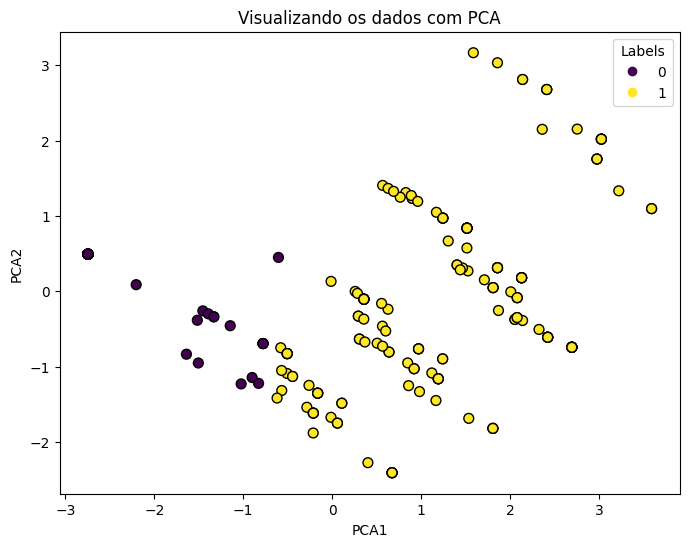

In [1294]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(df_2['PCA1'], df_2['PCA2'], c=labels_2, edgecolor='k', s=50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

### Criando a label e colunas

In [1295]:
dados_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
0,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Escultura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,1
3,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,1
4,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,1


In [1296]:
dados_original.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


In [1297]:
dados_original['Cluster'] = labels_2

In [1314]:
mapeamento_usa_app = {0: 'Não', 1: 'Sim'}
dados_original['Usaria o aplicativo?'] = dados_original['Cluster'].map(mapeamento_usa_app)
dados_original.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster,Usaria o scan?,Usaria o guia?,Usaria o aplicativo?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,1,Não,Não,Sim
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Não,Não,Não
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,1,Não,Não,Sim
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,1,Não,Não,Sim
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,1,Não,Não,Sim


In [1298]:
# mapeamento_usa_app = {4: 'Sim', 3: 'Sim', 2: 'Não', 1: 'Não', 0: 'Não'}
# mapeamento_usa_scan = {4: 'Sim', 3: 'Sim', 2: 'Não', 1: 'Não', 0: 'Não'}
# mapeamento_usa_guia = {4: 'Sim', 3: 'Não', 2: 'Não', 1: 'Não', 0: 'Não'}
# dados_original['Usaria o scan?'] = dados_original['Cluster'].map(mapeamento_usa_scan)
# dados_original['Usaria o guia?'] = dados_original['Cluster'].map(mapeamento_usa_guia)
# dados_original['Usaria o aplicativo?'] = dados_original['Cluster'].map(mapeamento_usa_app)
# dados_original.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster,Usaria o scan?,Usaria o guia?,Usaria o aplicativo?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,1,Não,Não,Não
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Não,Não,Não
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,1,Não,Não,Não
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,1,Não,Não,Não
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,1,Não,Não,Não


In [1315]:
# dados_original.to_excel('dados_possiveis_usuarios_c_label_2_clusters.xlsx', index=False)

# Modelo não supervisionado com PCA

In [1300]:
dados_3 = dados_original.copy()
dados_3.drop(columns=['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome', 'Hora da última modificação'], inplace=True)

In [1301]:
df_3 = dados_3.copy()
df_3.fillna("#", inplace=True)
for k, v in mapeamento_2.items():
    df_3[k] = df_3[k].map(v)
display(df_3)
df_3.loc[df_3['Há quanto tempo você se interessa por arte?'] == 'Não me interesso', 'Há quanto tempo você se interessa por arte?'] = '#'
for i in df_3:
    if df_3[i].dtype == object:
        print(i)
        dados_unique = df_3[i].unique()
        dados_unique.sort()
        mapeamento = {}
        for k, v in enumerate(dados_unique):
            mapeamento[v] = k

        df_3[i] = df_3[i].map(mapeamento)

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster,Usaria o scan?,Usaria o guia?,Usaria o aplicativo?
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,15,3,Não,Sim,2,Não,6,15,10,"Busca em navegadores (Google, Yahoo, Edge, Ope...",10,1,Não,Não,Não
1,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,0,0,#,#,0,#,0,0,0,#,0,0,Não,Não,Não
2,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,9,20,Sim,Sim,2,Não,8,1,0,#,0,1,Não,Não,Não
3,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,15,20,Não,Sim,2,Não,6,15,3,#,0,1,Não,Não,Não
4,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,15,20,Sim,Não,20,Sim,8,15,3,#,0,1,Não,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Entre 25 e 35 anos,Masculino,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,15,3,Sim,Sim,2,Não,8,15,10,"Busca em navegadores (Google, Yahoo, Edge, Ope...",2,1,Não,Não,Não
236,Entre 46 e 59 anos,Feminino,Ensino superior concluído,Classe A: superior a R$ 22 mil,De 5 a 9 anos,6,20,Não,Sim,20,Sim,8,15,10,Redes sociais,2,1,Não,Não,Não
237,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,5,20,Sim,Sim,20,Não,8,15,10,"Busca em navegadores (Google, Yahoo, Edge, Ope...",2,1,Não,Não,Não
238,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Menos de 2 anos,15,20,Não,Sim,20,Não,8,1,0,#,0,1,Não,Não,Não


Em qual faixa etária você se encaixa?
Com qual gênero você se identifica?
Qual seu nível de formação atual?
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Há quanto tempo você se interessa por arte?
Você já participou de algum curso ou atividade relacionada à arte?
Você segue artístas ou páginas relacionadas à arte nas rede sociais?
Você já usou um aplicativo de um museu ou relacionado à arte?
De que forma você costuma buscar essas informações?
Usaria o scan?
Usaria o guia?
Usaria o aplicativo?


In [1302]:
df_3

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster,Usaria o scan?,Usaria o guia?,Usaria o aplicativo?
0,5,1,1,3,5,15,3,1,2,2,1,6,15,10,4,10,1,0,0,0
1,2,0,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,0,1,2,1,9,20,2,2,2,1,8,1,0,0,0,1,0,0,0
3,5,1,1,1,3,15,20,1,2,2,1,6,15,3,0,0,1,0,0,0
4,4,1,5,0,4,15,20,2,1,20,2,8,15,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,1,5,1,4,15,3,2,2,2,1,8,15,10,4,2,1,0,0,0
236,4,0,5,0,2,6,20,1,2,20,2,8,15,10,6,2,1,0,0,0
237,2,0,5,1,4,5,20,2,2,20,1,8,15,10,4,2,1,0,0,0
238,2,0,5,2,5,15,20,1,2,20,1,8,1,0,0,0,1,0,0,0


In [1303]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df_3.columns
x = df_3.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

In [1304]:
principal_components

array([[-2.48808707e+00,  3.07084694e+00],
       [ 4.08845367e+00, -1.13989823e+00],
       [-3.13449125e-01,  9.75282964e-02],
       [-1.04199513e+00,  3.00543453e-01],
       [-2.40190833e+00, -1.85906227e+00],
       [ 4.28728711e+00,  5.31568843e-01],
       [ 4.12875513e+00, -1.39713296e+00],
       [-6.45982648e-01,  5.91803340e-01],
       [-1.41442983e+00, -1.45596965e+00],
       [-9.12699826e-01,  5.17390964e-01],
       [-4.46999697e-02, -1.84462879e-03],
       [-9.95562247e-01,  2.74844242e+00],
       [-9.72296878e-01, -1.47762901e+00],
       [-2.77499560e-01,  5.10156607e-01],
       [-2.42546628e+00,  2.39052469e+00],
       [ 4.31572512e+00,  1.09911671e+00],
       [ 9.51628398e-01, -8.44402842e-02],
       [-1.11661036e-02,  4.63666233e-01],
       [ 4.32492641e+00,  4.94526515e-01],
       [-1.87096038e+00,  2.68393589e+00],
       [ 4.31685662e+00,  7.82453248e-01],
       [-1.09709342e+00, -1.81272689e+00],
       [ 4.30765533e+00,  1.38704344e+00],
       [ 4.

In [1305]:
df_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])
df_3 = pd.concat([df_3, df_pca], axis=1)
df_3.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster,Usaria o scan?,Usaria o guia?,Usaria o aplicativo?,PCA1,PCA2
0,5,1,1,3,5,15,3,1,2,2,1,6,15,10,4,10,1,0,0,0,-2.488087,3.070847
1,2,0,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.088454,-1.139898
2,5,0,1,2,1,9,20,2,2,2,1,8,1,0,0,0,1,0,0,0,-0.313449,0.097528
3,5,1,1,1,3,15,20,1,2,2,1,6,15,3,0,0,1,0,0,0,-1.041995,0.300543
4,4,1,5,0,4,15,20,2,1,20,2,8,15,3,0,0,1,0,0,0,-2.401908,-1.859062


In [1306]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 4, random_state=0, n_init="auto")

modelo.fit(df_3[['PCA1', 'PCA2']])

centers = modelo.cluster_centers_  

labels = modelo.labels_

print(labels)

[1 0 2 2 3 0 0 2 3 2 2 1 3 2 1 0 2 2 0 1 0 3 0 0 1 0 0 2 0 1 1 1 0 2 2 0 2
 1 2 0 2 2 2 1 1 0 0 3 3 0 0 1 2 2 0 1 2 2 0 1 3 0 3 0 1 2 3 2 3 2 2 0 2 3
 1 3 2 3 0 0 3 0 0 0 1 2 0 1 2 2 2 1 2 2 2 2 0 3 3 2 1 0 2 2 2 2 1 2 1 0 2
 0 2 3 3 0 1 0 0 2 2 3 0 3 3 2 0 1 2 2 2 0 1 2 3 3 0 0 2 1 3 1 1 0 0 0 3 0
 2 1 1 1 0 1 1 0 1 1 0 3 0 0 1 0 3 2 1 0 1 1 2 1 2 2 0 3 3 3 3 3 3 3 3 3 1
 3 0 1 1 0 0 2 2 0 3 3 2 3 0 3 2 0 3 3 1 3 3 3 3 3 0 3 3 3 3 0 2 0 3 2 1 2
 0 3 3 3 2 3 3 0 3 3 3 3 3 3 3 3 3 3]


In [1307]:
dados_3['Cluster'] = labels
dados_3.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster,Usaria o scan?,Usaria o guia?,Usaria o aplicativo?
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,1,Não,Não,Não
1,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Não,Não,Não
2,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,2,Não,Não,Não
3,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2,Não,Não,Não
4,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,3,Não,Não,Não


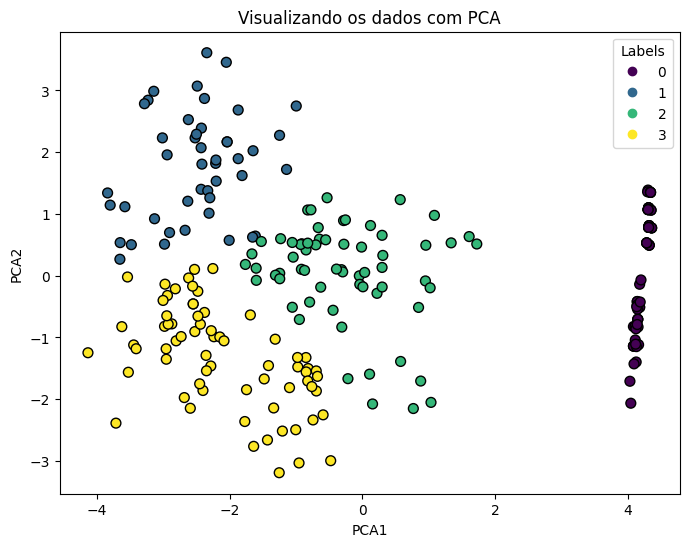

In [1308]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(df_3['PCA1'], df_3['PCA2'], c=labels, edgecolor='k', s=50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

In [1309]:
cluster_0_3 = dados_3.loc[dados_3['Cluster'] == 0]
cluster_1_3 = dados_3.loc[dados_3['Cluster'] == 1]
cluster_2_3 = dados_3.loc[dados_3['Cluster'] == 2]
cluster_3_3 = dados_3.loc[dados_3['Cluster'] == 3]

In [1310]:
for i in cluster_1_3:
    print(cluster_1_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      39
Entre 36 e 45 anos     3
Entre 18 e 24 anos     1
Entre 25 e 35 anos     1
Entre 46 e 59 anos     1
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     30
Masculino    10
Outro         5
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino fundamental      21
Cursando ensino médio            16
Ensino fundamental incompleto     3
Ensino superior concluído         3
Cursando ensino superior          2
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    22
Classe B: entre R$ 7,1 mil e R$ 22 mil     12
Classes D/E: até R$ 2,9 mil                10
Classe A: superior a R$ 22 mil              1
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       16
De 2 a 4 anos             8


In [1311]:
for i in cluster_0_3:
    print(cluster_0_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      35
Entre 18 e 24 anos     8
Entre 25 e 35 anos     7
Entre 36 e 45 anos     7
Entre 46 e 59 anos     6
60+ anos               1
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     35
Masculino    29
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino fundamental                22
Ensino superior concluído                  17
Cursando ensino médio                      13
Cursando ensino superior                    8
Ensino superior incompleto/não iniciado     4
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    28
Classe B: entre R$ 7,1 mil e R$ 22 mil     22
Classe A: superior a R$ 22 mil              8
Classes D/E: até R$ 2,9 mil                 6
Name: count, dtype: int64
Há quanto tempo você se interessa por art

In [1312]:
for i in cluster_2_3:
    print(cluster_2_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      50
Entre 18 e 24 anos     5
Entre 25 e 35 anos     3
Entre 46 e 59 anos     3
Entre 36 e 45 anos     2
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     37
Masculino    25
Outro         1
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino médio                      38
Cursando ensino fundamental                16
Ensino superior concluído                   8
Ensino superior incompleto/não iniciado     1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    26
Classe B: entre R$ 7,1 mil e R$ 22 mil     25
Classes D/E: até R$ 2,9 mil                 8
Classe A: superior a R$ 22 mil              4
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
De 5 a 9 anos            17
De 2 a 4 anos           

In [1313]:
for i in cluster_3_3:
    print(cluster_3_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Entre 25 e 35 anos    23
Entre 46 e 59 anos    16
60+ anos              11
Entre 18 e 24 anos     9
Entre 36 e 45 anos     8
Menos de 18 anos       1
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     47
Masculino    21
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  52
Ensino superior incompleto/não iniciado     8
Cursando ensino superior                    4
Cursando ensino médio                       2
Ensino médio incompleto                     1
Ensino fundamental incompleto               1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    25
Classe B: entre R$ 7,1 mil e R$ 22 mil     24
Classe A: superior a R$ 22 mil             15
Classes D/E: até R$ 2,9 mil                 4
Name: count, dtype: i